In [3]:
# Imports

# Numpy,Pandas
import numpy as np
import pandas as pd
import datetime

# matplotlib,seaborn,pyecharts

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
# plt.style.use('ggplot')  #风格设置近似R这种的ggplot库
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import missingno as msno

# import sklearn

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler


#  忽略弹出的warnings
import warnings
warnings.filterwarnings('ignore')  

pd.set_option('display.float_format', lambda x: '%.4f' % x)

from imblearn.over_sampling import SMOTE
import itertools

In [4]:
data_cr =  pd.read_csv('C:/Users/liuyu/Documents/Kaggle datasets/Credit Card Fraud Detection/creditcardfraud/creditcard.csv')

In [5]:
data_cr.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0000,-1.3598,-0.0728,2.5363,1.3782,-0.3383,0.4624,0.2396,0.0987,0.3638,...,-0.0183,0.2778,-0.1105,0.0669,0.1285,-0.1891,0.1336,-0.0211,149.6200,0
1,0.0000,1.1919,0.2662,0.1665,0.4482,0.0600,-0.0824,-0.0788,0.0851,-0.2554,...,-0.2258,-0.6387,0.1013,-0.3398,0.1672,0.1259,-0.0090,0.0147,2.6900,0
2,1.0000,-1.3584,-1.3402,1.7732,0.3798,-0.5032,1.8005,0.7915,0.2477,-1.5147,...,0.2480,0.7717,0.9094,-0.6893,-0.3276,-0.1391,-0.0554,-0.0598,378.6600,0
3,1.0000,-0.9663,-0.1852,1.7930,-0.8633,-0.0103,1.2472,0.2376,0.3774,-1.3870,...,-0.1083,0.0053,-0.1903,-1.1756,0.6474,-0.2219,0.0627,0.0615,123.5000,0
4,2.0000,-1.1582,0.8777,1.5487,0.4030,-0.4072,0.0959,0.5929,-0.2705,0.8177,...,-0.0094,0.7983,-0.1375,0.1413,-0.2060,0.5023,0.2194,0.2152,69.9900,0


In [6]:
data_cr.shape

(284807, 31)

In [8]:
data_cr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [10]:
data_cr.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0000,94813.8596,47488.1460,0.0000,54201.5000,84692.0000,139320.5000,172792.0000
V1,284807.0000,0.0000,1.9587,-56.4075,-0.9204,0.0181,1.3156,2.4549
V2,284807.0000,0.0000,1.6513,-72.7157,-0.5985,0.0655,0.8037,22.0577
V3,284807.0000,-0.0000,1.5163,-48.3256,-0.8904,0.1798,1.0272,9.3826
V4,284807.0000,0.0000,1.4159,-5.6832,-0.8486,-0.0198,0.7433,16.8753
V5,284807.0000,-0.0000,1.3802,-113.7433,-0.6916,-0.0543,0.6119,34.8017
V6,284807.0000,0.0000,1.3323,-26.1605,-0.7683,-0.2742,0.3986,73.3016
V7,284807.0000,-0.0000,1.2371,-43.5572,-0.5541,0.0401,0.5704,120.5895
V8,284807.0000,-0.0000,1.1944,-73.2167,-0.2086,0.0224,0.3273,20.0072
V9,284807.0000,-0.0000,1.0986,-13.4341,-0.6431,-0.0514,0.5971,15.5950


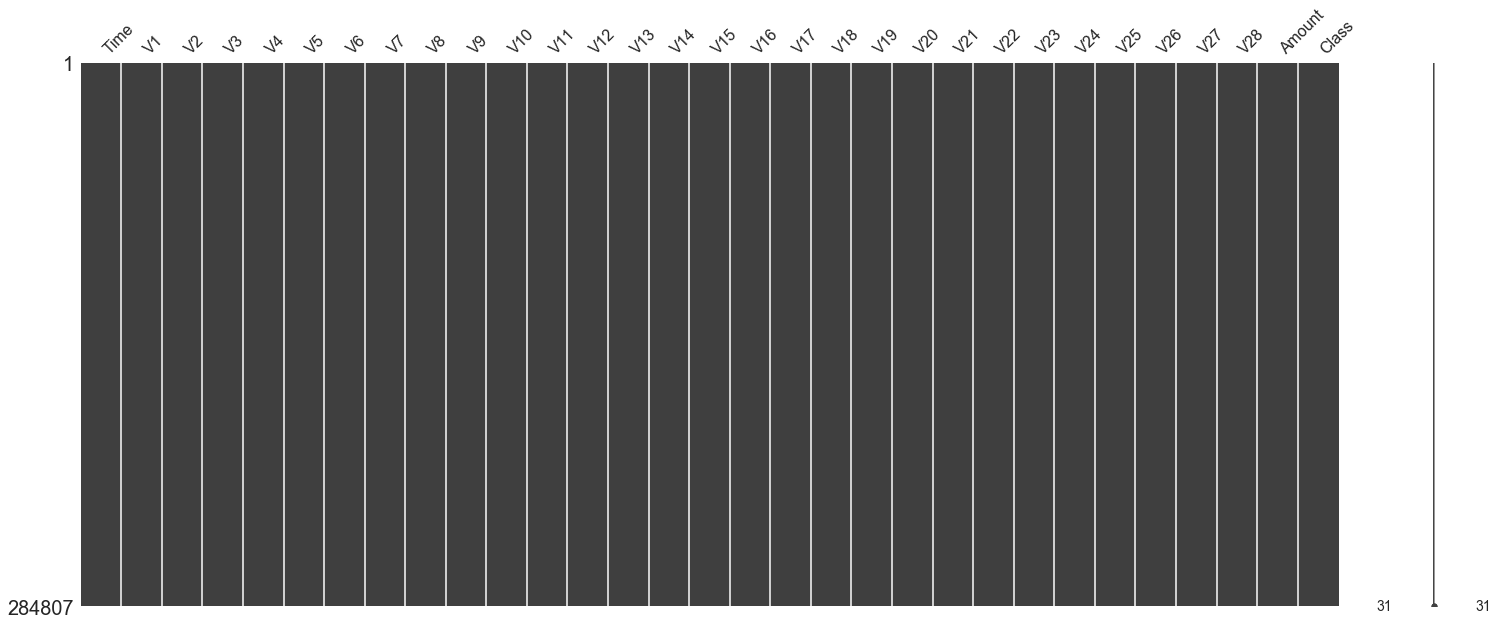

In [11]:
msno.matrix(data_cr)

## Feature engineering

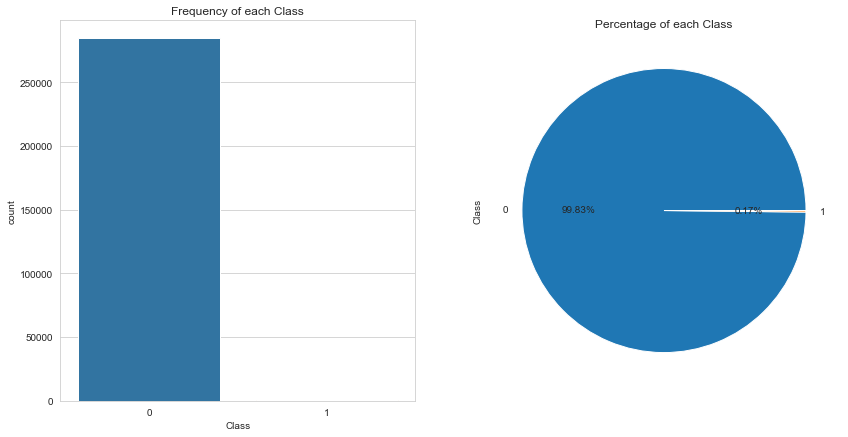

In [12]:
fig, axs = plt.subplots(1,2,figsize=(14,7))
sns.countplot(x='Class',data=data_cr,ax=axs[0])
axs[0].set_title("Frequency of each Class")
data_cr['Class'].value_counts().plot(x=None,y=None, kind='pie', ax=axs[1],autopct='%1.2f%%')
axs[1].set_title("Percentage of each Class")
plt.show()

In [13]:
data_cr.groupby('Class').size()

Class
0    284315
1       492
dtype: int64

In [14]:
#数据集284,807笔交易中有492笔是信用卡被盗刷交易，信用卡被盗刷交易占总体比例为0.17%，
#信用卡交易正常和被盗刷两者数量不平衡，样本不平衡影响分类器的学习，稍后我们将会使用过采样的方法解决样本不平衡的问题。

In [15]:
#特征Time的单为秒，我们将其转化为以小时为单位对应每天的时间。
data_cr['Hour'] =data_cr["Time"].apply(lambda x : divmod(x, 3600)[0]) #单位转换

[Text(1, -1.0, '−1.0'),
 Text(1, -0.5, '−0.5'),
 Text(1, 0.0, '0.0'),
 Text(1, 0.5, '0.5'),
 Text(1, 1.0, '1.0')]

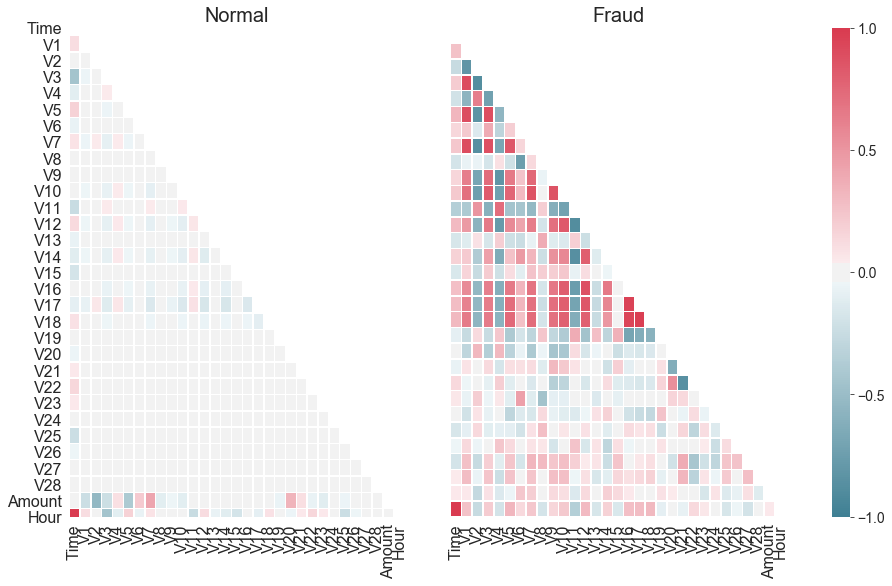

In [17]:
Xfraud = data_cr.loc[data_cr["Class"] == 1] # update Xfraud & XnonFraud with cleaned data
XnonFraud = data_cr.loc[data_cr["Class"] == 0]

correlationNonFraud = XnonFraud.loc[:, data_cr.columns != 'Class'].corr()
mask = np.zeros_like(correlationNonFraud)
indices = np.triu_indices_from(correlationNonFraud)
mask[indices] = True

grid_kws = {"width_ratios": (.9, .9, .05), "wspace": 0.2}
f, (ax1, ax2, cbar_ax) = plt.subplots(1, 3, gridspec_kw=grid_kws, \
                                     figsize = (14, 9))

cmap = sns.diverging_palette(220, 8, as_cmap=True)
ax1 =sns.heatmap(correlationNonFraud, ax = ax1, vmin = -1, vmax = 1, \
    cmap = cmap, square = False, linewidths = 0.5, mask = mask, cbar = False)
ax1.set_xticklabels(ax1.get_xticklabels(), size = 16); 
ax1.set_yticklabels(ax1.get_yticklabels(), size = 16); 
ax1.set_title('Normal', size = 20)

correlationFraud = Xfraud.loc[:, data_cr.columns != 'Class'].corr()
ax2 = sns.heatmap(correlationFraud, vmin = -1, vmax = 1, cmap = cmap, \
 ax = ax2, square = False, linewidths = 0.5, mask = mask, yticklabels = False, \
    cbar_ax = cbar_ax, cbar_kws={'orientation': 'vertical', \
                                 'ticks': [-1, -0.5, 0, 0.5, 1]})
ax2.set_xticklabels(ax2.get_xticklabels(), size = 16); 
ax2.set_title('Fraud', size = 20);

cbar_ax.set_yticklabels(cbar_ax.get_yticklabels(), size = 14)

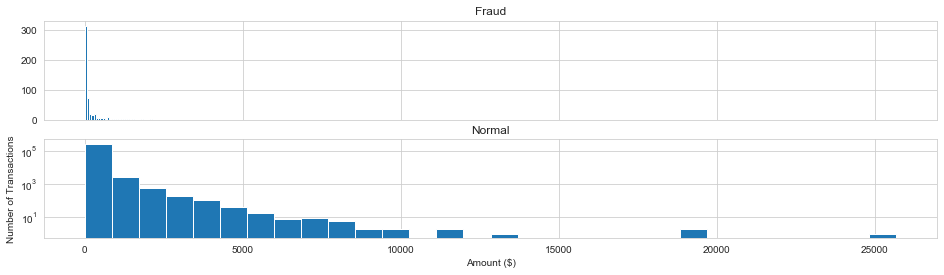

In [18]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(16,4))

bins = 30

ax1.hist(data_cr["Amount"][data_cr["Class"]== 1], bins = bins)
ax1.set_title('Fraud')

ax2.hist(data_cr["Amount"][data_cr["Class"] == 0], bins = bins)
ax2.set_title('Normal')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show()

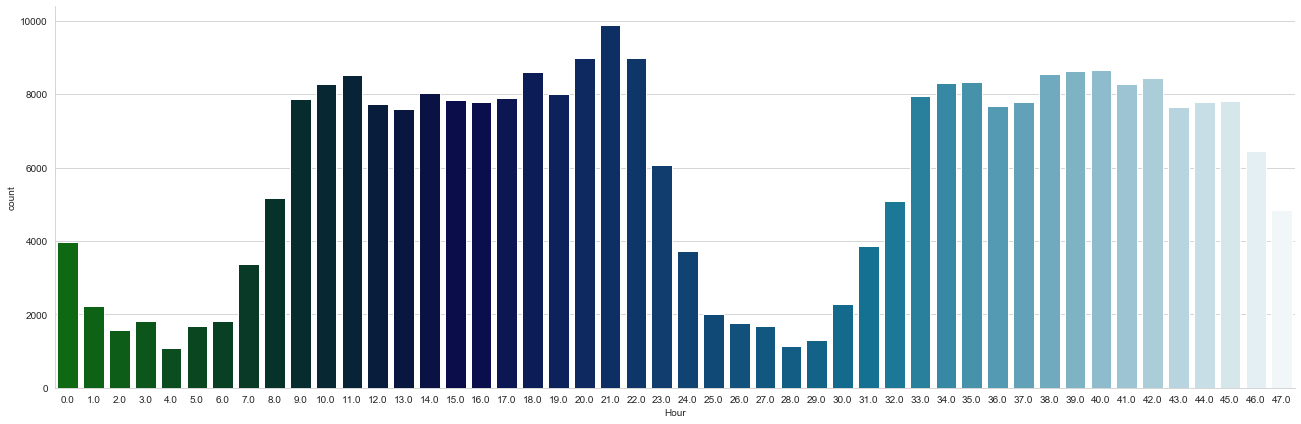

In [19]:
sns.factorplot(x="Hour", data=data_cr, kind="count",  palette="ocean", size=6, aspect=3)

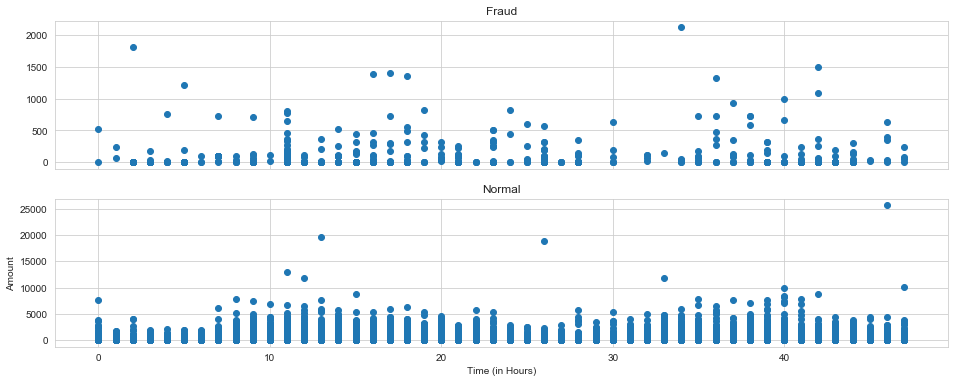

In [20]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(16,6))

ax1.scatter(data_cr["Hour"][data_cr["Class"] == 1], data_cr["Amount"][data_cr["Class"]  == 1])
ax1.set_title('Fraud')

ax2.scatter(data_cr["Hour"][data_cr["Class"] == 0], data_cr["Amount"][data_cr["Class"] == 0])
ax2.set_title('Normal')

plt.xlabel('Time (in Hours)')
plt.ylabel('Amount')
plt.show()

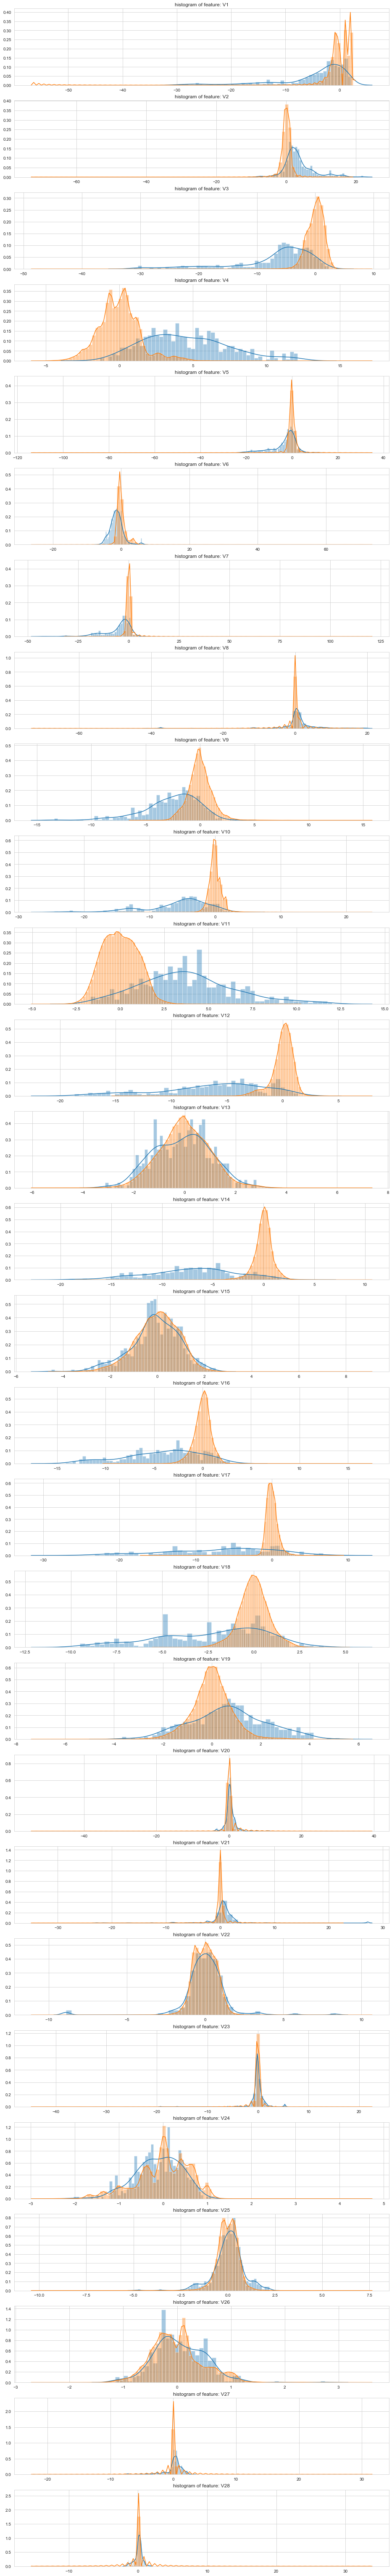

In [21]:
#Select only the anonymized features.
v_feat = data_cr.ix[:,1:29].columns
plt.figure(figsize=(16,28*4))
gs = gridspec.GridSpec(28, 1)
for i, cn in enumerate(data_cr[v_feat]):
    ax = plt.subplot(gs[i])
    sns.distplot(data_cr[cn][data_cr["Class"] == 1], bins=50)
    sns.distplot(data_cr[cn][data_cr["Class"] == 0], bins=100)
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(cn))

In [22]:
droplist = ['V8', 'V13', 'V15', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28','Time']
data_new = data_cr.drop(droplist, axis = 1)

In [23]:
# 对Amount和Hour 进行特征缩放
col = ['Amount','Hour']
from sklearn.preprocessing import StandardScaler # 导入模块
sc =StandardScaler() # 初始化缩放器
data_new[col] =sc.fit_transform(data_new[col])#对数据进行标准化
data_new.head()

,V1,V2,V3,V4,V5,V6,V7,V9,V10,V11,V12,V14,V16,V17,V18,V19,Amount,Class,Hour
0,-1.3598,-0.0728,2.5363,1.3782,-0.3383,0.4624,0.2396,0.3638,0.0908,-0.5516,-0.6178,-0.3112,-0.4704,0.2080,0.0258,0.4040,0.2450,0,-1.9603
1,1.1919,0.2662,0.1665,0.4482,0.0600,-0.0824,-0.0788,-0.2554,-0.1670,1.6127,1.0652,-0.1438,0.4639,-0.1148,-0.1834,-0.1458,-0.3425,0,-1.9603
2,-1.3584,-1.3402,1.7732,0.3798,-0.5032,1.8005,0.7915,-1.5147,0.2076,0.6245,0.0661,-0.1659,-2.8901,1.1100,-0.1214,-2.2619,1.1607,0,-1.9603
3,-0.9663,-0.1852,1.7930,-0.8633,-0.0103,1.2472,0.2376,-1.3870,-0.0550,-0.2265,0.1782,-0.2879,-1.0596,-0.6841,1.9658,-1.2326,0.1405,0,-1.9603
4,-1.1582,0.8777,1.5487,0.4030,-0.4072,0.0959,0.5929,0.8177,0.7531,-0.8228,0.5382,-1.1197,-0.4514,-0.2370,-0.0382,0.8035,-0.0734,0,-1.9603


## Modeling

In [26]:
x_feature = list(data_new.columns)
x_feature.remove('Class')

In [42]:
x_val = data_new[x_feature]
y_val = data_new['Class']

In [43]:
names = data_cr[x_feature].columns
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=10,random_state=123)#构建分类随机森林分类器
clf.fit(x_val, y_val) #对自变量和因变量进行拟合
names, clf.feature_importances_
for feature in zip(names, clf.feature_importances_):
    print(feature)

('V1', 0.016428960714381)
('V2', 0.01208895434189035)
('V3', 0.019333047192017876)
('V4', 0.041954380358988706)
('V5', 0.018124180590092024)
('V6', 0.021263258405632892)
('V7', 0.023306471455539244)
('V9', 0.02261630822969816)
('V10', 0.08104934217396947)
('V11', 0.06706027490232477)
('V12', 0.13196226602546982)
('V14', 0.12929955280214375)
('V16', 0.14082738583269538)
('V17', 0.21127316425921303)
('V18', 0.019528994094810775)
('V19', 0.020030149135284992)
('Amount', 0.011748452413655339)
('Hour', 0.012104857072192589)


(-1, 18)

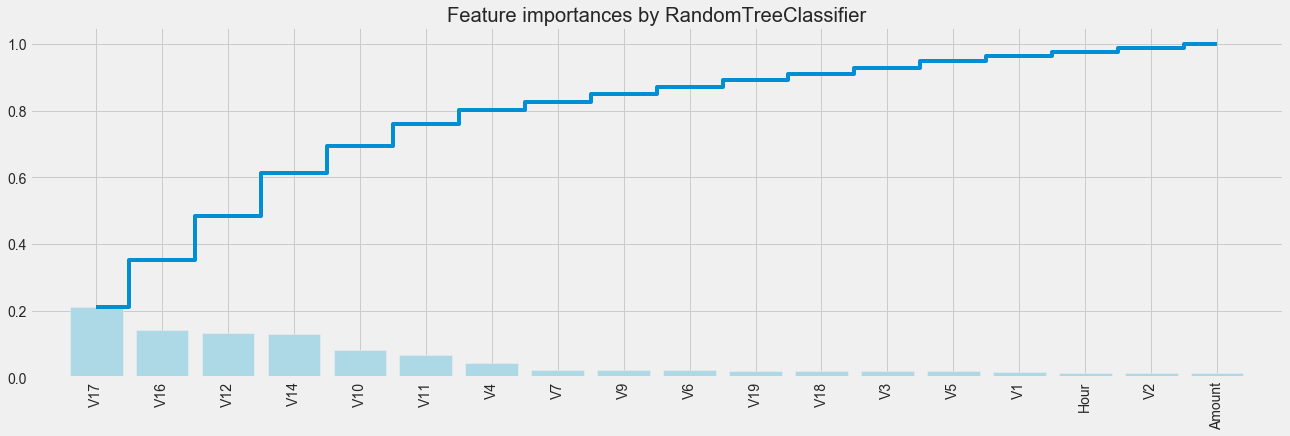

In [44]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12,6)

## feature importances 可视化##
importances = clf.feature_importances_
feat_names = names
indices = np.argsort(importances)[::-1]
fig = plt.figure(figsize=(20,6))
plt.title("Feature importances by RandomTreeClassifier")
plt.bar(range(len(indices)), importances[indices], color='lightblue',  align="center")
plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative')
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, len(indices)])

In [27]:
X = data_cr[x_feature]
y = data_cr["Class"]

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0) # random_state = 0 每次切分的数据都一样

In [39]:
from imblearn.over_sampling import SMOTE # 导入SMOTE算法模块
# 处理不平衡数据
sm = SMOTE(random_state=42)    # 处理过采样的方法
X_train, y_train = sm.fit_sample(X, y)
print('通过SMOTE方法平衡正负样本后')
n_sample = y_train.shape[0]
n_pos_sample = y_train[y_train == 0].shape[0]
n_neg_sample = y_train[y_train == 1].shape[0]
print('样本个数：{}; 正样本占{:.2%}; 负样本占{:.2%}'.format(n_sample,
                                                   n_pos_sample / n_sample, n_neg_sample/n_sample))

通过SMOTE方法平衡正负样本后
样本个数：568630; 正样本占50.00%; 负样本占50.00%


In [40]:
from sklearn.linear_model import LogisticRegression
clf1 = LogisticRegression() # 构建逻辑回归分类器
clf1.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [45]:
predicted1 = clf.predict(X_train) # 通过分类器产生预测结果

In [47]:
print("Test set accuracy score: {:.5f}".format(accuracy_score(predicted1, y_train,)))

Test set accuracy score: 0.90153


In [48]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
##################################################################################

In [51]:
# 构建参数组合
param_grid = {'C': [0.01,0.1, 1, 10, 100, 1000,],
                            'penalty': [ 'l1', 'l2']}

grid_search = GridSearchCV(LogisticRegression(),  param_grid, cv=10) # 确定模型LogisticRegression，和参数组合param_grid ，cv指定10折
grid_search.fit(X_train, y_train) # 使用训练集学习算法

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [52]:
results = pd.DataFrame(grid_search.cv_results_) 
best = np.argmax(results.mean_test_score.values)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.5f}".format(grid_search.best_score_))

Best parameters: {'C': 1000, 'penalty': 'l1'}
Best cross-validation score: 0.95548


In [53]:
y_pred = grid_search.predict(X_test)
print("Test set accuracy score: {:.5f}".format(accuracy_score(y_test, y_pred,)))

Test set accuracy score: 0.98564


In [54]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     85296
           1       0.10      0.90      0.18       147

    accuracy                           0.99     85443
   macro avg       0.55      0.94      0.58     85443
weighted avg       1.00      0.99      0.99     85443



In [55]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.5f}".format(grid_search.best_score_))

Best parameters: {'C': 1000, 'penalty': 'l1'}
Best cross-validation score: 0.95548


Recall metric in the testing dataset:  0.8979591836734694


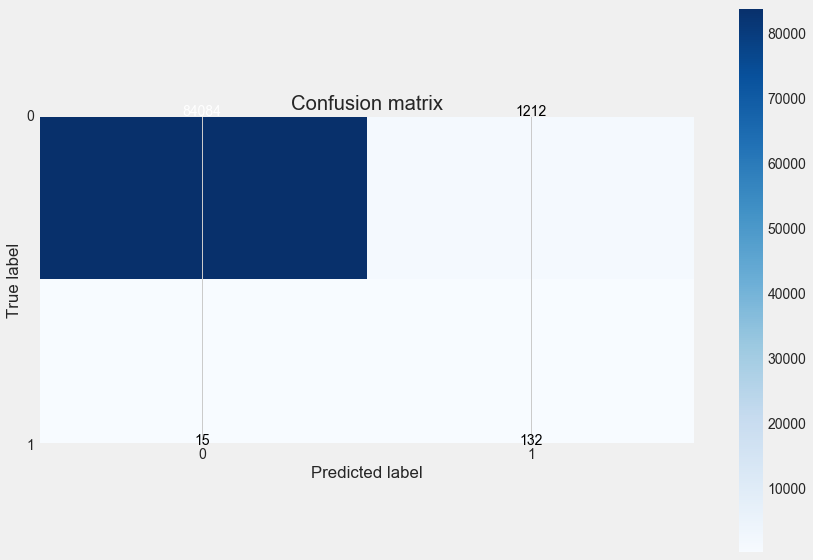

In [60]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)  # 生成混淆矩阵
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure(figsize=(12,8))
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

In [ ]:
147

Recall metric in the testing dataset:  0.9455782312925171
Recall metric in the testing dataset:  0.9455782312925171
Recall metric in the testing dataset:  0.9387755102040817
Recall metric in the testing dataset:  0.9115646258503401
Recall metric in the testing dataset:  0.8979591836734694
Recall metric in the testing dataset:  0.891156462585034
Recall metric in the testing dataset:  0.8843537414965986
Recall metric in the testing dataset:  0.8639455782312925
Recall metric in the testing dataset:  0.8435374149659864


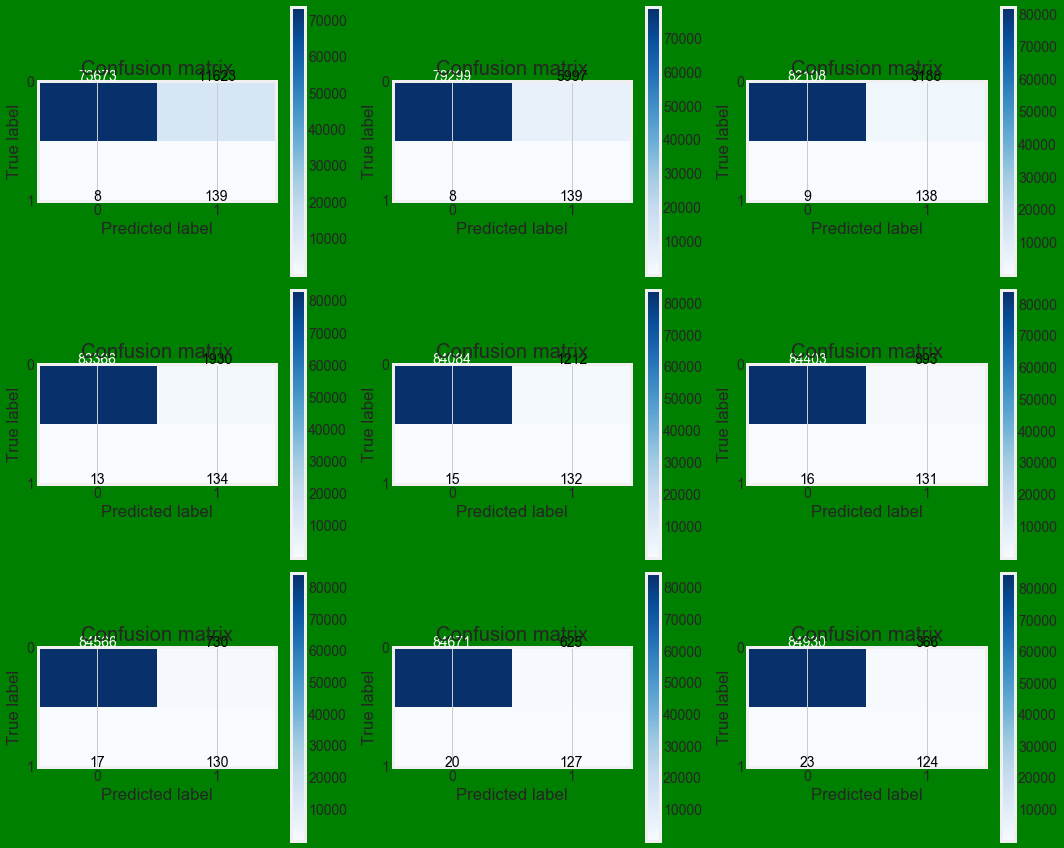

In [67]:
y_pred_proba = grid_search.predict_proba(X_test)  #predict_prob 获得一个概率值

thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]  # 设定不同阈值

plt.figure(figsize=(15,12),facecolor='green')

j = 1
for i in thresholds:
    y_test_predictions_high_recall = y_pred_proba[:,1] > i#预测出来的概率值是否大于阈值 
    
    plt.subplot(3,3,j)
    j += 1
    
    # Compute confusion matrix
    cnf_matrix = confusion_matrix(y_test, y_test_predictions_high_recall)
    np.set_printoptions(precision=2)

    print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

    # Plot non-normalized confusion matrix
    class_names = [0,1]
    plot_confusion_matrix(cnf_matrix
                          , classes=class_names)
    plt.tight_layout()

In [69]:
y_test_predictions_prob

array([False, False, False, ..., False, False, False])

In [72]:
y_pred_proba[:,0]

array([0.9 , 0.94, 0.96, ..., 0.95, 0.92, 0.73])

In [73]:
from sklearn.metrics import roc_auc_score

In [75]:
roc_auc_score(y_test,y_pred_proba[:,1])

0.9775875319176629

In [96]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

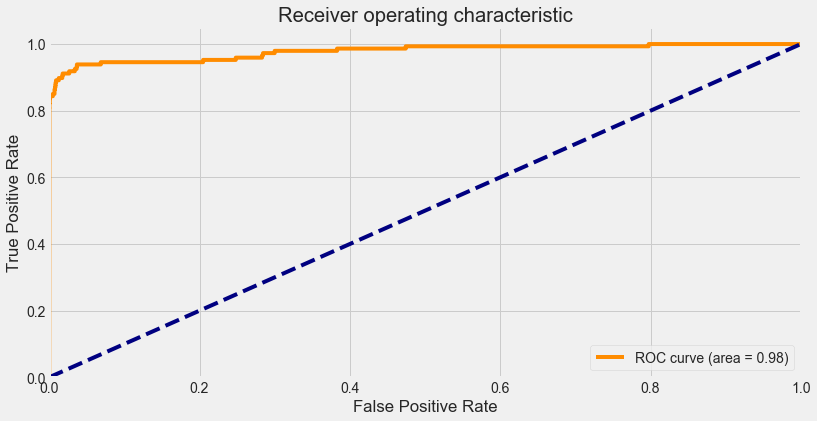

In [102]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test,y_pred_proba[:,1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

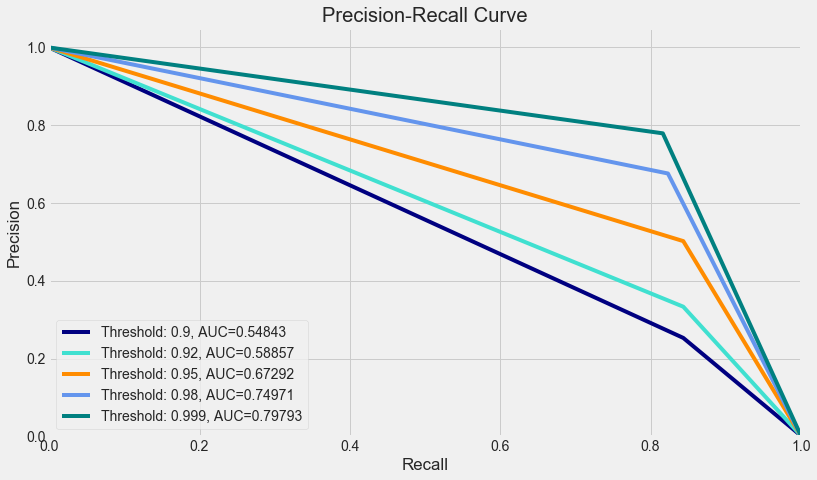

In [78]:
from itertools import cycle

thresholds = [0.9,0.92,0.95,0.98,0.999]
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal'])#, 'red', 'yellow', 'green', 'blue','black'])

plt.figure(figsize=(12,7))

j = 1
for i,color in zip(thresholds,colors):
    y_test_predictions_prob = y_pred_proba[:,1] > i #预测出来的概率值是否大于阈值  

    precision, recall, thresholds = precision_recall_curve(y_test, y_test_predictions_prob)
    area = auc(recall, precision)
    
    # Plot Precision-Recall curve
    plt.plot(recall, precision, color=color,
                 label='Threshold: %s, AUC=%0.5f' %(i , area))
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall Curve')
    plt.legend(loc="lower left")
